In [50]:
import numpy as np
# numpy is aliased as np
import pandas as pd
# pandas is aliased as pd
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import tensorflow as tf
# tensorflow is aliased as tf
from tensorflow.keras import layers

### load the MNIST Dataset

The MNIST dataset is a widely used dataset in machine learning and consists of a set of 60,000 training images and 
10,000 test images of handwritten digits from 0 to 9.

In [51]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [77]:
## checking the shapes of training and testing dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [53]:
# displayiing the data of x_train
print(x_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


### Preprocess the data

1.Reshaping the input data which is work as a input for CNN<br>
2.The original shape of x_train is (num_train_samples, 28, 28), where num_train_samples is the number of training samples,<br>     and 28 by 28 represents the dimensions of each image<br>
3.CNN takes the input data with the shape,(num_samples, height, width, channels)..<br>
4.Images are grayscale, so the channel value is set to 1<br>
5.After reshaping the datatype of array will change to float32 which is common data type used in deep learning.<br>

In [54]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Normalization

The original pixel values in the MNIST dataset range from 0 to 255, where 0 represents black and 255 represents white.<br> Dividing the pixel values by 255 normalizes the data so that the values are scaled between 0 and 1.<br>

In [55]:
x_train /= 255
x_test /= 255
print(x_train.dtype)
print(x_test.dtype)

float32
float32


In [56]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Build the neural network architecture

In [57]:
model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                77450     
                                                                 
Total params: 96,266
Trainable params: 96,266
Non-trainable params: 0
__________________________________________________

This summary shows that the model has five layers:

1. Conv2D: This layer performs convolutional operations on the input. It has 32 filters of size 3x3 and applies the<br> 
    ReLU activation function. The output shape is (None, 26, 26, 32), where None represents the batch size.<br>

2. MaxPooling2D: This layer performs max pooling, which reduces the spatial dimensions of the input.<br> 
    It uses a 2x2 pooling window. The output shape is (None, 13, 13, 32), as the pooling operation reduces each spatial<br> 
    dimension by a factor of 2.<br>

3. Conv2D: This layer is similar to the previous Conv2D layer but has 64 filters instead of 32.<br> 
    The output shape is (None, 11, 11, 64).<br>

4. Flatten: This layer flattens the previous output, converting it from a 4D tensor to a 2D tensor.<br> 
    The output shape is (None, 7744), where 7744 is the result of multiplying the spatial dimensions.<br>

5. Dense: This layer is a fully connected layer with 10 units and applies the ReLU activation function.<br> 
   It takes the flattened input and produces an output of shape (None, 10), where 10 represents the number of classes in<br>
   the classification task.<br>


### plot a neural network model

In [59]:
#tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
#img = plt.imread('model.png')
#plt.imshow(img)
#plt.axis('off')
#plt.show()

### Compile the model

In [60]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

In [61]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1326 - accuracy: 0.9601 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0334 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0313 - accuracy: 0.9900 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0227 - accuracy: 0.9922 - val_loss: 0.0327 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0163 - accuracy: 0.9952 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0430 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0354 -

### Evaluate the model

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.0452 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


### Displaying a Grayscale Image

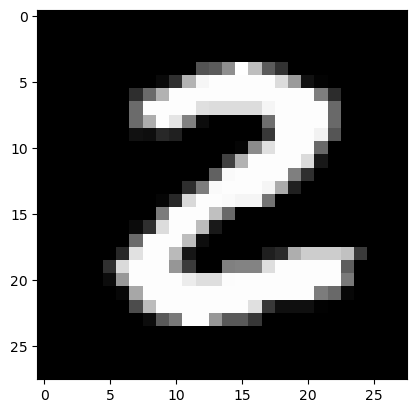

In [64]:
img = x_train[25]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

### Predicting the Result

In [71]:
img= img.reshape(1, 28, 28, 1)
a= model.predict([img])
predicted_class = np.argmax(a)
print("Predicted class: {}".format(predicted_class))

1/1 [==============================] - 0s 24ms/step
Predicted class: 2
